In [1]:
# 演習問題２
push!(LOAD_PATH, "./")
using Bspline
using Plots
# B-spline関数のリファインメント
function prefinement(pb,pa,k)    # pb:リファインメント前のp, pa:リファインメント後のp
    l = k[1]
    r = k[end]
    n = pa-pb
    prepend!(k,[l for i in 1:n])
    append!(k,[r for i in 1:n])
end
function hrefinement(p,k,M)    # M:リファインメント後の基底関数の個数
    N1 = M-p
    for i in 1:N1-1
        insert!(k,p+1+i,i/N1)
    end
end

hrefinement (generic function with 1 method)

In [2]:
# 初期の基底関数
p1i = 1
p2i = 1
k1i = [0.0,0.0,1.0,1.0]
k2i = [0.0,0.0,1.0,1.0]
N1i = length(k1i)-p1i-1
N2i = length(k2i)-p2i-1
a1i = [0.0, 1.0]
a2i = [0.0, 1.0]

# リファインメント後の基底関数
p1 = 2
p2 = 2
k1 = copy(k1i)
k2 = copy(k2i)
N1 = 6
N2 = 6
prefinement(p1i,p1,k1)
prefinement(p2i,p2,k2)
hrefinement(p1,k1,N1)
hrefinement(p2,k2,N2)

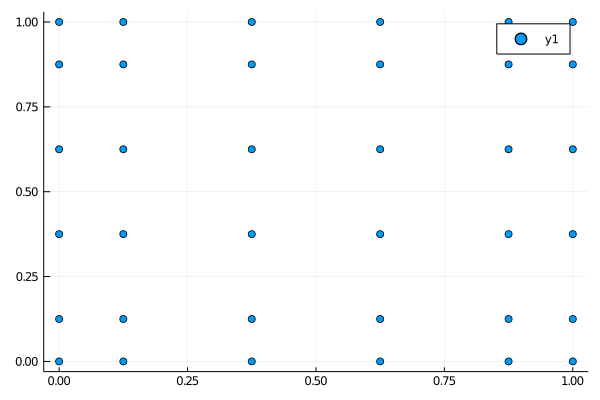

In [3]:
# リファインメント後の制御点を求める(1次元)
function refinementcp(p,k,a,pr,kr)
    N = length(k)-p-1
    Nr = length(kr)-pr-1
    ar = zeros(Float64,Nr)
    
    # Cijを求める
    κ = [kr[i]*(Nr-i)/(Nr+1)+kr[i+p+1]*(i+1)/(Nr+1) for i in 1:Nr]
    A = [Bs(j,pr,kr,κ[i]) for i in 1:Nr, j in 1:Nr]
    x = zeros(Float64,Nr)
    C = zeros(Float64,(N,Nr))
    for i in 1:N
        b = [Bs(i,p,k,κ[j]) for j in 1:Nr]
        x = A\b
        for j in 1:Nr
            C[i,j] = x[j]
        end
    end

    # 制御点を求める
    for i in 1:Nr
        ar[i] = sum(C[j,i]*a[j] for j in 1:N)
    end
    return ar
end

# リファインメント後のAを求める
a1 = refinementcp(p1i,k1i,a1i,p1,k1)
a2 = refinementcp(p2i,k2i,a2i,p2,k2)
a = zeros(Float64,(N1*N2,2))
for α in 1:N1*N2
    i = div(α-1,N2)+1
    j = (α-1)%N2+1
    a[α,1] = a1[i]
    a[α,2] = a2[j]
end

plot(a[:,1],a[:,2],seriestype=:scatter)